<a href="https://colab.research.google.com/github/Nayoung-young/bootcamp-python/blob/main/0704_case01_Starbucks_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🙄 스타벅스 이벤트 분석**

> **목차(Context)**

* 분석목적 및 데이터 살펴보기
* 문제해결 프로세스 정의
* Part 1 - 「데이터 확인 및 전처리」
* Part 2 - 「EDA 및 분석」
* Part 3 - 「인사이트 도출」

##· **분석 목적**

> **시나리오**

```
스타벅스는 진행한 이벤트에 대하여
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
%%time
base_path = "/content/drive/MyDrive/dataset_2023/패스트캠퍼스/starbucks-customer-data/"

transcript = pd.read_csv(base_path+"transcript.csv").drop(columns=["Unnamed: 0"])
profile = pd.read_csv(base_path+"profile.csv").drop(columns=["Unnamed: 0"])
portfolio = pd.read_csv(base_path+"portfolio.csv").drop(columns=["Unnamed: 0"])

CPU times: user 265 ms, sys: 34.7 ms, total: 300 ms
Wall time: 2.41 s


> **분석 목적**

  1.   고객 응답 수렴
  2.   프로모션 개선방안 인사이트 제시

>**데이터 살펴보기**

1. `Profile Table`: 설문 참여한 스타벅스 회원의 개인 정보


2. `Transcript Table`: 이벤트에 참여한 실제 유저들의 응답

3. `Portfolio Table`: 이벤트를 운영했던 내역에 관한 정보


## **· 문제해결 프로세스**
---
> **문제 정의**

```

```

> **기대 효과**

```
```

> **해결 방안**

```
```

> **성과 측정**

```
```

> **현업 적용**

```
```

> **주요코드 미리 살펴보기**

```
```

#📌 **Part 1**
**┗ 데이터 확인 및 전처리**  
---

## **· Data 확인**  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

> **Transcript**

In [4]:
# ▶ Data 형태 확인
print(transcript.shape)

(306534, 4)


In [5]:
# ▶ Data type 확인
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
# ▶ Null 값 확인
print(transcript.isnull().sum())

person    0
event     0
value     0
time      0
dtype: int64


In [7]:
# ▶ sample 확인
transcript.sample(5)

person           event  \
26482   a104f5f8f470487693d626d36317dcf7     transaction   
193946  9fe7598aa80447f281433beb1c2b5a48     transaction   
170487  7cd890d4d691465aa25b683943a1c056    offer viewed   
245621  2ad9a1463cca40ed994e2a0dde0ffb08  offer received   
109881  7b3b8100d6444861803cefc6b13c9a43     transaction   

                                                   value  time  
26482                                   {'amount': 9.43}    36  
193946                                  {'amount': 6.41}   474  
170487  {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   414  
245621  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   576  
109881                                  {'amount': 1.83}   324

In [8]:
# ▶ 고유값 확인 - transcript.event
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [9]:
transcript[transcript['person'] == 'fcc43e232f794e639bc3185272353566']

person            event  \
63843   fcc43e232f794e639bc3185272353566   offer received   
71705   fcc43e232f794e639bc3185272353566      transaction   
71706   fcc43e232f794e639bc3185272353566  offer completed   
85015   fcc43e232f794e639bc3185272353566     offer viewed   
91893   fcc43e232f794e639bc3185272353566      transaction   
94855   fcc43e232f794e639bc3185272353566      transaction   
96170   fcc43e232f794e639bc3185272353566      transaction   
98773   fcc43e232f794e639bc3185272353566      transaction   
101287  fcc43e232f794e639bc3185272353566      transaction   
105763  fcc43e232f794e639bc3185272353566      transaction   
107838  fcc43e232f794e639bc3185272353566      transaction   
121522  fcc43e232f794e639bc3185272353566   offer received   
129677  fcc43e232f794e639bc3185272353566     offer viewed   
129678  fcc43e232f794e639bc3185272353566      transaction   
129679  fcc43e232f794e639bc3185272353566  offer completed   
134827  fcc43e232f794e639bc3185272353566      transaction   
137088  fcc43e232f794e639bc3185272353566      transaction   
145105  fcc43e232f794e639bc3185272353566      transaction   
146935  fcc43e232f794e639bc3185272353566      transaction   
182133  fcc43e232f794e639bc3185272353566      transaction   
184558  fcc43e232f794e639bc3185272353566      transaction   
198202  fcc43e232f794e639bc3185272353566      transaction   
209553  fcc43e232f794e639bc3185272353566   offer received   
217797  fcc43e232f794e639bc3185272353566      transaction   
217798  fcc43e232f794e639bc3185272353566  offer completed   
224564  fcc43e232f794e639bc3185272353566     offer viewed   
227445  fcc43e232f794e639bc3185272353566      transaction   
255832  fcc43e232f794e639bc3185272353566   offer received   
261475  fcc43e232f794e639bc3185272353566      transaction   
261476  fcc43e232f794e639bc3185272353566  offer completed   
281434  fcc43e232f794e639bc3185272353566      transaction   
283597  fcc43e232f794e639bc3185272353566      transaction   
291226  fcc43e232f794e639bc3185272353566     offer viewed   
291227  fcc43e232f794e639bc3185272353566      transaction   
297674  fcc43e232f794e639bc3185272353566      transaction   

                                                    value  time  
63843    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   168  
71705                                   {'amount': 11.31}   174  
71706   {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...   174  
85015    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   210  
91893                                   {'amount': 13.55}   234  
94855                                   {'amount': 14.17}   246  
96170                                    {'amount': 8.22}   252  
98773                                   {'amount': 13.32}   264  
101287                                  {'amount': 12.62}   276  
105763                                  {'amount': 13.44}   300  
107838                                   {'amount': 22.5}   312  
121522   {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   336  
129677   {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   342  
129678                                   {'amount': 7.66}   342  
129679  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   342  
134827                                   {'amount': 25.1}   354  
137088                                  {'amount': 28.81}   360  
145105                                   {'amount': 23.7}   384  
146935                                    {'amount': 7.4}   390  
182133                                  {'amount': 10.58}   438  
184558                                  {'amount': 16.39}   444  
198202                                  {'amount': 15.65}   486  
209553   {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   504  
217797                                  {'amount': 12.76}   504  
217798  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   504  
224564   {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   516  
227445                                  {'amount': 10.9

- person: 각 고객 id
- event: 해당 이벤트
- time: 얼마 시간 내에 응답을 했느냐

> **Profile**

In [10]:
# ▶ Data 형태 확인
print('profile_df', profile.shape)

profile_df (17000, 5)


In [11]:
# ▶ Data type 확인
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [13]:
# ▶ Null 값 확인 - 갯수
print(profile.isnull().sum())

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64


In [14]:
# ▶ Null 값 확인 - 비율
for col in profile.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (profile[col].isnull().sum() / profile[col].shape[0]))
  print(msg)

column:     gender	 Percent of NaN Value: 12.79%
column:        age	 Percent of NaN Value: 0.00%
column:         id	 Percent of NaN Value: 0.00%
column: became_member_on	 Percent of NaN Value: 0.00%
column:     income	 Percent of NaN Value: 12.79%


In [15]:
# ▶ sample 확인
profile.sample(5)

gender  age                                id  became_member_on   income
9021       M   29  632b544911b5482c89d73988161ea899          20170910  31000.0
8604       M   73  ecb3be2f4d4940e0ba4093d1f05b05b9          20150219  46000.0
4758       M   61  95ba904ccb2b4a22bd1fa14321e98488          20170111  59000.0
968      NaN  118  87f1b04d4a4340f9acb453c3203c1793          20180709      NaN
11879      F   40  def4837ebbf546ffb3a7966edc8fdba8          20150118  54000.0

- gender 컬럼에 결측치 존재

> **Porfolio**

In [16]:
# ▶ Data 형태 확인
print('portfolio_df', portfolio.shape)

portfolio_df (10, 6)


In [17]:
# ▶ Data type 확인
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [18]:
# ▶ sample 확인
portfolio.sample(5)

reward                              channels  difficulty  duration  \
2       0            ['web', 'email', 'mobile']           0         4   
6       2  ['web', 'email', 'mobile', 'social']          10        10   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
7       0         ['email', 'mobile', 'social']           0         3   
5       3  ['web', 'email', 'mobile', 'social']           7         7   

      offer_type                                id  
2  informational  3f207df678b143eea3cee63160fa8bed  
6       discount  fafdcd668e3743c1bb461111dcafc2a4  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
7  informational  5a8bc65990b245e5a138643cd4eb9837  
5       discount  2298d6c36e964ae4a3e7e9706d1fb8c2

In [19]:
portfolio[portfolio['id'] =='ae264e3637204a6fb9bb56bc8210ddfd']

reward                       channels  difficulty  duration offer_type  \
0      10  ['email', 'mobile', 'social']          10         7       bogo   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd

## **· Data 전처리**
---
**고려해야 할 부분 (우선 순위)**

```
1. profile : gender, income에 결측치 존재
2. transcript : value가 딕셔너리 형태 (key: offer_id, amount)
3. portfolio : channels가 리스트 형태
```

In [20]:
profile.info() # 17000 - 14825 = 2175

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [21]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인.
nulls = profile[profile.isnull().any(axis = 1)]

print(nulls.age.value_counts()) # 이미 어떤 처리가 들어간 듯?
print(nulls.id.value_counts()) # 각각 모두 유니크한 id, 추가로 정보를 확인할 수 없다

118    2175
Name: age, dtype: int64
68be06ca386d4c31939f3a4f0e3dd783    1
36ca38ce449645fcacc6fe0465010d64    1
105b50604fdc47298aa592d8946b8ac5    1
cd1f2f7d93614d5ea28f27c4875be0ff    1
42636c607b97409ca9d284a8d13405ba    1
                                   ..
2bf7e519dfca407c8287f756717345b9    1
0914283b4a2948d18d7978e28f10ef1f    1
3c67bf028e684c71b3b3dca7a55522fa    1
26982ffe1e974c71bed1036e5ce0c167    1
c02b10e8752c4d8e9b73f918558531f7    1
Name: id, Length: 2175, dtype: int64


In [22]:
profile.dropna(inplace = True)
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


#📌 **Part 2**
**┗ EDA 및 분석**  
---

## · **설문 응답자 분석(Profile)**

- **Profile** 데이터 활용
- 설문에 참여한 사람 중 정상적인 데이터로 판단된 데이터에 대한 분석을 수행
- 각 컬럼마다 원하는 통계량을 찾은 뒤, 해당 통계량을 시각화해줄 plot을 seaborn에서 가져와 구현

In [23]:
profile.sample(5)

gender  age                                id  became_member_on  \
12997      F   57  e0d0425503774a8290d0703ed3f37bbf          20180617   
3957       M   48  a68b9966964240caa919b0c08c201904          20180112   
11177      F   48  8b5c15b62ddf404da88012ef8327bc1d          20171209   
11368      F   58  86545afdcdd543b4adbd6c0c4961db1b          20160415   
1137       M   56  193fb0f3de9144b6b195d7164de6325a          20140407   

         income  
12997  115000.0  
3957    37000.0  
11177   94000.0  
11368   72000.0  
1137    57000.0

In [24]:
# became_member_on 컬럼을 datetime으로 바꾸기

profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [25]:
# transcript의 person == profile의 id 일대일대응?
transcript.person.nunique()

17000

> **성별관련 분석**

In [26]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

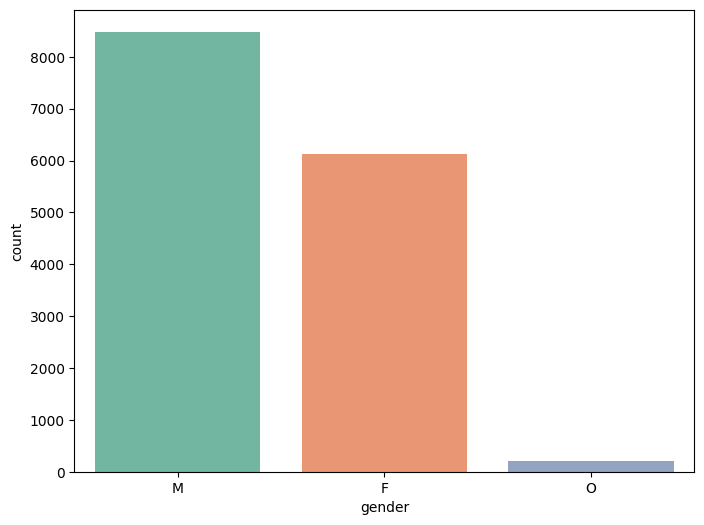

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data=profile, x ="gender", palette="Set2", order=profile.gender.value_counts().index)
plt.show()

In [28]:
pd.pivot_table(data=profile, index="gender", values ="income") # 평균적인 Female의 income이 더 높았다

income
gender              
F       71306.412139
M       61194.601603
O       63287.735849

> **연령대 분석**

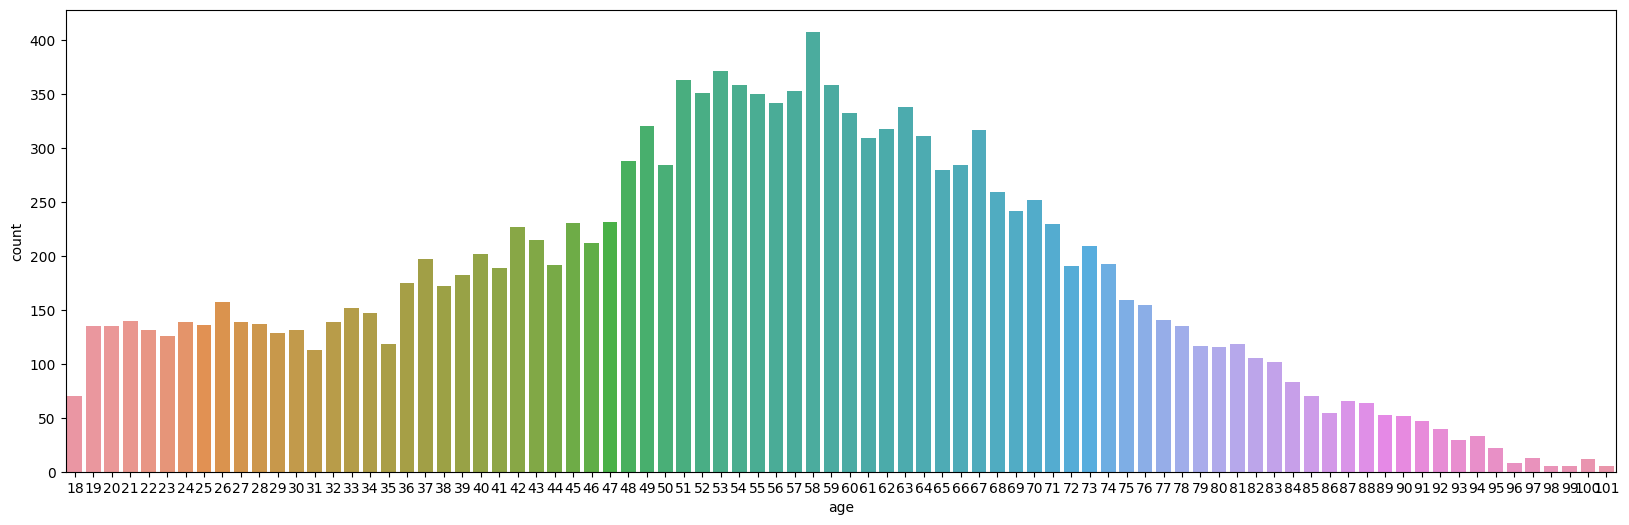

CPU times: user 647 ms, sys: 92.8 ms, total: 740 ms
Wall time: 641 ms


In [29]:
# 먼저 countplot
%%time
plt.figure(figsize = (20, 6))
sns.countplot(data=profile, x = "age")
plt.show()

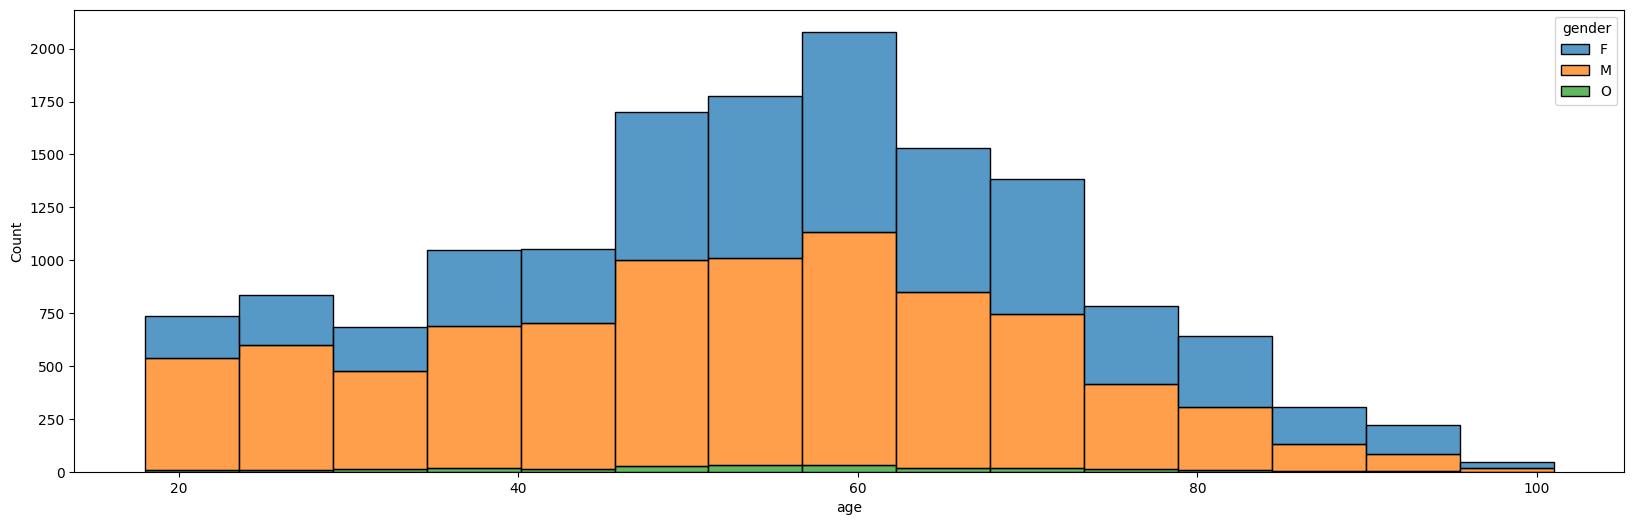

CPU times: user 318 ms, sys: 94.4 ms, total: 412 ms
Wall time: 328 ms


In [30]:
%%time
plt.figure(figsize = (20, 6))
sns.histplot(data=profile, x="age", bins = 15, hue = 'gender', multiple = 'stack')
plt.show()

In [31]:
pd.pivot_table(data=profile, index ='gender', values = ['age', 'income']) # 평균값 확인 가능

age        income
gender                         
F       57.544950  71306.412139
M       52.116690  61194.601603
O       54.400943  63287.735849

> **회원가입 날짜**

In [32]:
# 연, 월 정도

profile['join_yr'] = profile.became_member_on.dt.year
profile['join_month'] = profile.became_member_on.dt.month

profile.head()

gender  age                                id became_member_on    income  \
1       F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0   
3       F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0   
5       M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   70000.0   
8       M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   53000.0   
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   51000.0   

    join_yr  join_month  
1      2017           7  
3      2017           5  
5      2018           4  
8      2018           2  
12     2017          11

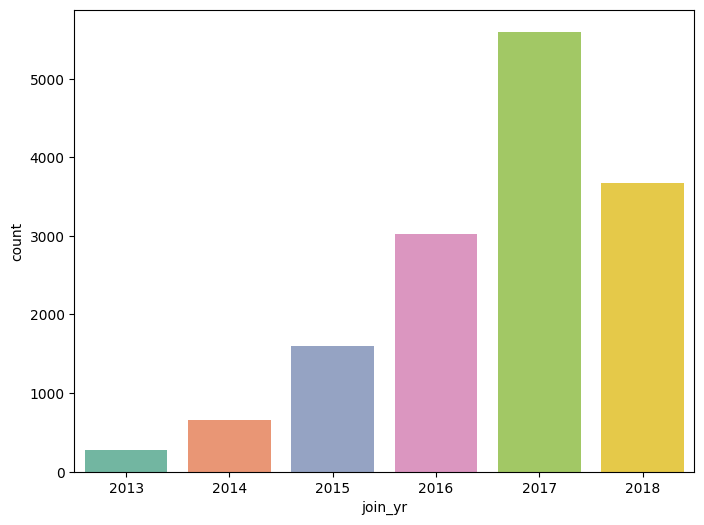

CPU times: user 157 ms, sys: 83.2 ms, total: 241 ms
Wall time: 144 ms


In [33]:
%%time
plt.figure(figsize = (8, 6))

sns.countplot(data = profile, x = "join_yr", palette="Set2")
plt.show()


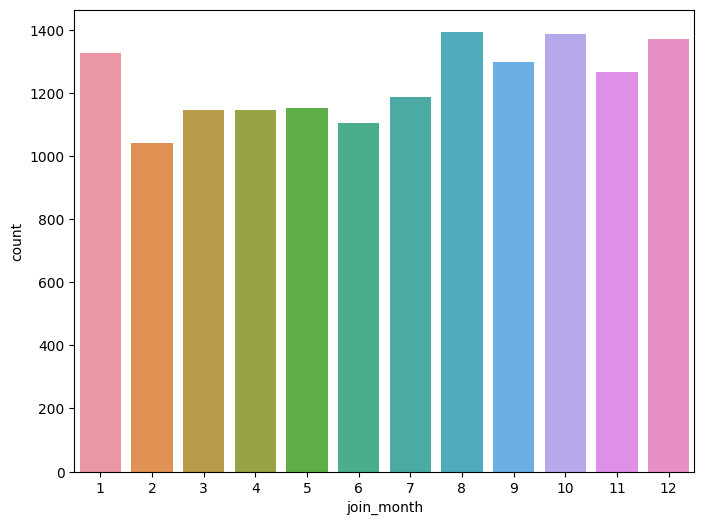

CPU times: user 195 ms, sys: 102 ms, total: 298 ms
Wall time: 200 ms


In [34]:
%%time
plt.figure(figsize = (8, 6))

sns.countplot(data = profile, x = "join_month")
plt.show()

In [35]:
x = profile.join_month.value_counts().index
y = profile.join_month.value_counts().values

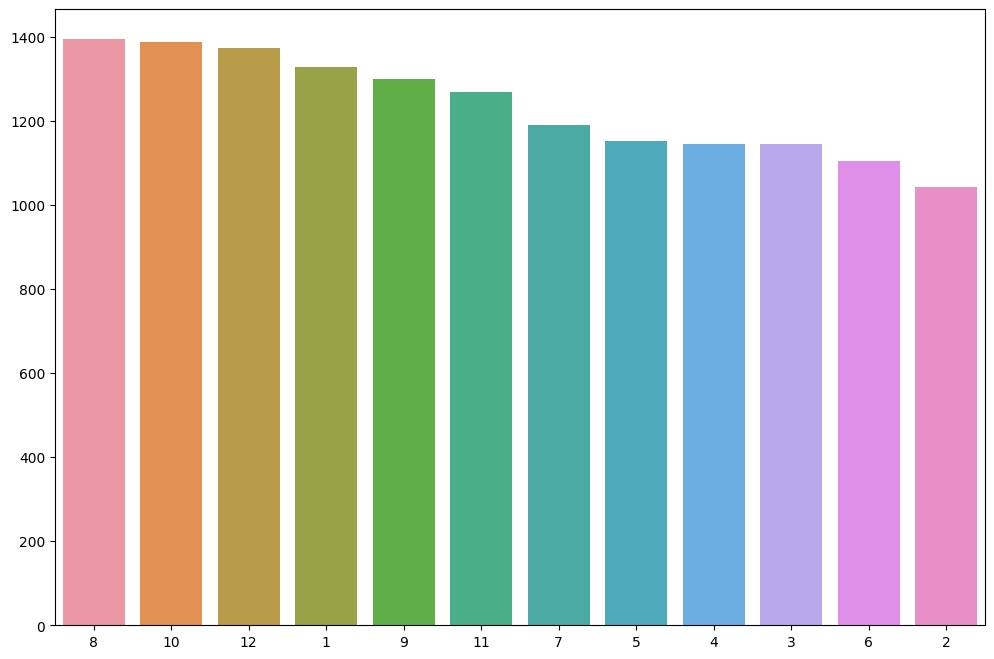

CPU times: user 208 ms, sys: 96.5 ms, total: 305 ms
Wall time: 197 ms


In [36]:
%%time
# 가로 막대그래프 그리기
plt.figure(figsize = (12, 8))

sns.barplot(x=x, y =y, order = x)

#sns.countplot(data = profile, y = "join_month")
plt.show()

In [37]:
profile.join_month.value_counts()

8     1395
10    1386
12    1372
1     1327
9     1299
11    1268
7     1189
5     1152
4     1145
3     1145
6     1105
2     1042
Name: join_month, dtype: int64

> **Profile - 수입에 대한 분석**

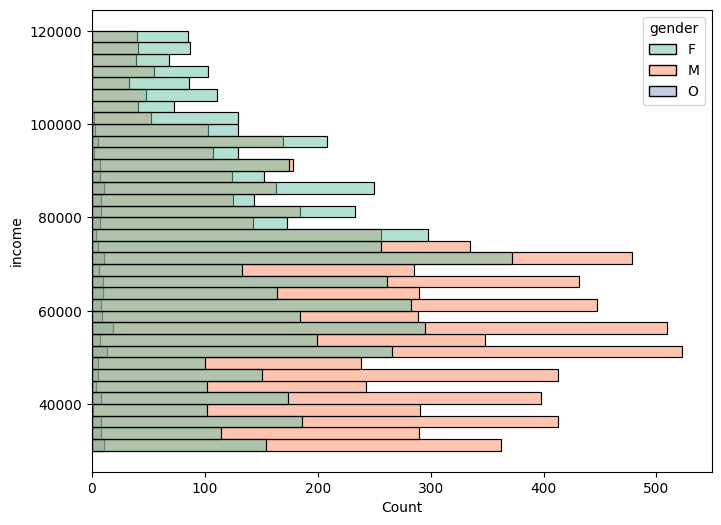

In [38]:
plt.figure(figsize = (8,6))

sns.histplot(data=profile, y ="income", palette="Set2", hue ="gender")#, multiple="stack")
plt.show()

> profile 데이터에 대한 상관관계 분석

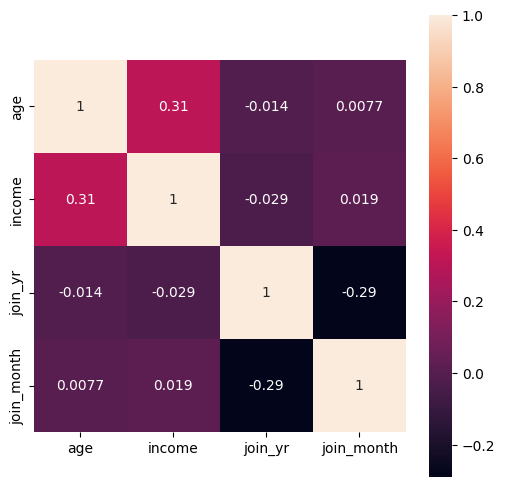

In [39]:
plt.figure(figsize = (6,6))
sns.heatmap(data=profile.corr(), square=True, annot=True)
plt.show()

## · **이벤트 퍼널 분석(Transcript)**


In [40]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

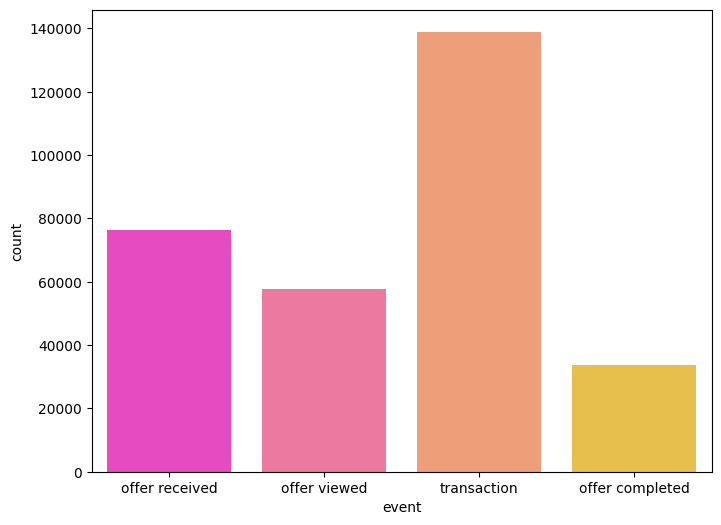

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(data=transcript, x ="event", palette="spring")
plt.show() # 그럼 얘네는 비율로 봐야 하는 것 같은데

In [44]:
def get_transaction(x):
  if x == 'transaction': return 1
  else: return 0

transcript['transaction'] = transcript.event.apply(lambda x: get_transaction(x))
# transcript.transaction

In [45]:
transcript.groupby('transaction')['event'].count()

transaction
0    167581
1    138953
Name: event, dtype: int64

> **event 퍼널 분석**

In [46]:
# 퍼널 준비
not_transaction = transcript[transcript['transaction'] == 0]
# cnts = not_transaction['event'].count()
transaction_cnts = transcript[transcript['transaction'] == 1].event.count()


temp_df = not_transaction.groupby('event').agg(cnts = ('event', 'count')).reset_index()
temp_df['cnts'] += transaction_cnts

temp_df.sort_values(by='cnts', ascending= False, inplace=True)
temp_df = temp_df.reset_index(drop=True)
temp_df.loc[3] = ['transaction', transaction_cnts]

temp_df

event    cnts
0   offer received  215230
1     offer viewed  196678
2  offer completed  172532
3      transaction  138953

In [47]:
# 퍼널로 그려보기
import plotly.express as px

fig = px.funnel_area(names = temp_df['event'], values =temp_df['cnts'])
fig.show()

# 출처: https://plotly.com/python/funnel-charts/

# 보류

In [48]:
pd.pivot_table(data=transcript, index="event", values="time")

time
event                      
offer completed  401.052801
offer received   332.579519
offer viewed     354.290515
transaction      381.584334

> **이벤트별 소요시간**

In [49]:
temp = sorted(transcript.time.value_counts()[:6].index)
print(temp)

for i in range(len(temp)-1):
  print(temp[i+1] - temp[i], end = " ")

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

In [50]:
transcript.time.value_counts()

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

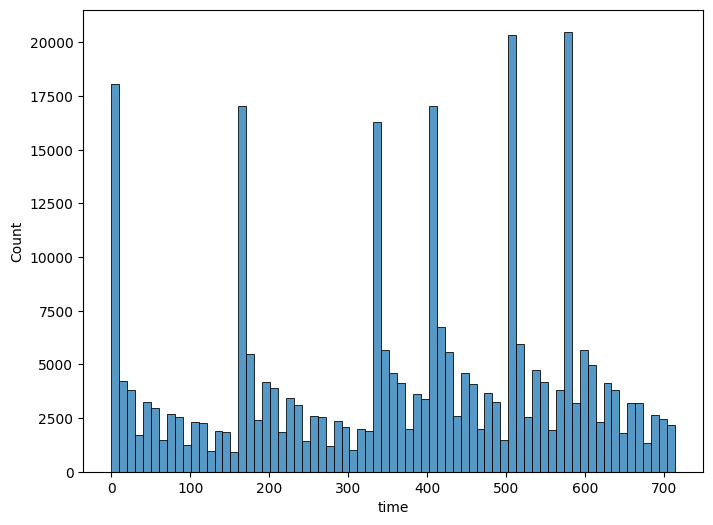

In [51]:
plt.figure(figsize = (8, 6))
sns.histplot(data=transcript, x="time")
plt.show()



In [52]:
transcript.head() # 그렇다면 value에서 offer id를 뽑아낸 뒤 grouping해야할 것 같다

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  transaction  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0            0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0            0

In [53]:
temp_df = transcript.loc[transcript.time.isin(temp), :]
temp_df

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
262132  08eb126ad33f447ca3ad076482445c05     transaction   
262133  1b4df4b48bf64727a4c445909aea1251    offer viewed   
262134  ff737c250d2343729ade04c4f6eb1001     transaction   
262135  400d0536e8794cbb855b0d882d67cbda    offer viewed   
262136  01d26f638c274aa0b965d24cefe3183f     transaction   

                                                   value  time  transaction  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            0  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            0  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            0  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0            0  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0            0  
...                                                  ...   ...          ...  
262132                                 {'amount': 16.93}   576            1  
262133  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   576            0  
262134                                  {'amount': 4.78}   576            1  
262135  {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   576            0  
262136                                  {'amount': 6.61}   576            1  

[98880 rows x 5 columns]

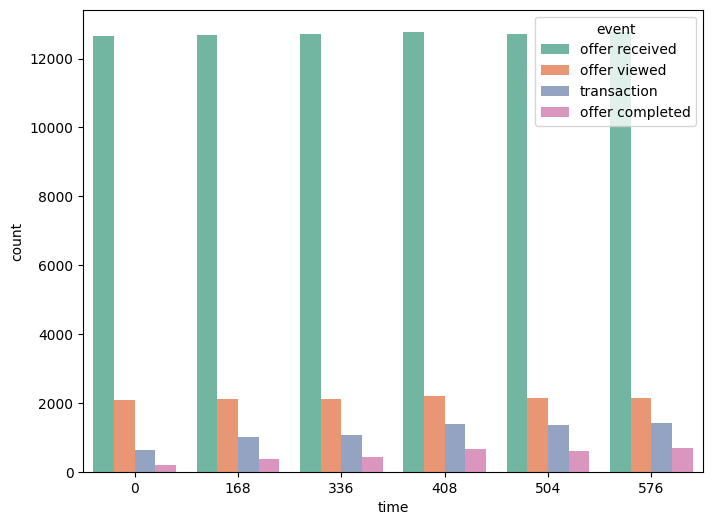

In [54]:
plt.figure(figsize = (8, 6))

# sns.countplot(data=temp_df, x="event", palette="Set2", hue ="time")
sns.countplot(data=temp_df, x="time", palette="Set2", hue ="event")
plt.show()

저 사람들은 왜 transaction으로 변환을 많이 안 했을까? 저 transaction 기간을 줄이기 위해서는 어떻게 해야 할까? renewal하는 방법은 무엇이 있을까?

- 이 결과론적인 방법을 다음 이벤트 때 써먹을 수도 있고

## · **이벤트 분석(Portfolio)**

- **Transcript** 데이터 활용

#(Advanced, optional) value에 대한 분석

In [55]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time  transaction  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            0  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            0  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            0  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0            0  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0            0  
...                                                  ...   ...          ...  
306529                    {'amount': 1.5899999999999999}   714            1  
306530                                  {'amount': 9.53}   714            1  
306531                                  {'amount': 3.61}   714            1  
306532                    {'amount': 3.5300000000000002}   714            1  
306533                                  {'amount': 4.05}   714            1  

[306534 rows x 5 columns]

In [56]:
list(transcript.value[0].keys())[0]

'offer id'

In [57]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time  transaction  \
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            0   
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            0   
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            0   
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0            0   
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0            0   
...                                                  ...   ...          ...   
306529                    {'amount': 1.5899999999999999}   714            1   
306530                                  {'amount': 9.53}   714            1   
306531                                  {'amount': 3.61}   714            1   
306532                    {'amount': 3.5300000000000002}   714            1   
306533                                  {'amount': 4.05}   714            1   

       value_key                       value_value  
0       offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9  
1       offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7  
2       offer id  2906b810c7d4411798c6938adc9daaa5  
3       offer id  fafdcd668e3743c1bb461111dcafc2a4  
4       offer id  4d5c57ea9a6940dd891ad53e9dbe8da0  
...          ...                               ...  
306529    amount                              1.59  
306530    amount                              9.53  
306531    amount                              3.61  
306532    amount                              3.53  
306533    amount                              4.05  

[306534 rows x 7 columns]

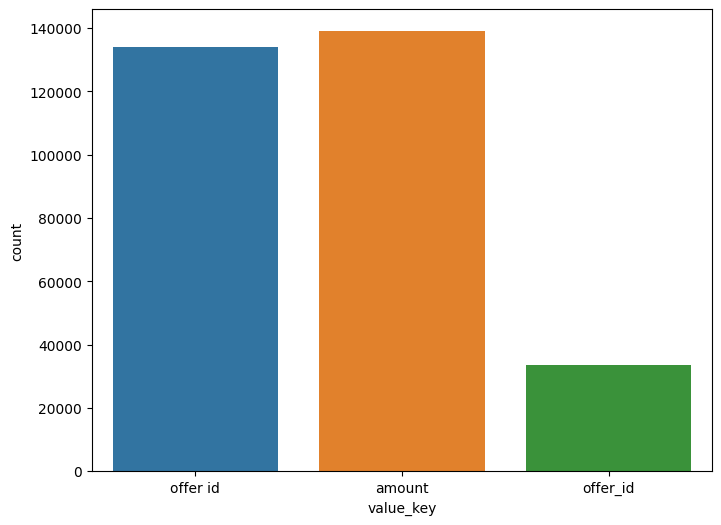

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [59]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [60]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

id
0       9b98b8c7a33c4b65b9aebfe6a799e6d9
1       0b1e1539f2cc45b7b9fa7c272da2e1d7
2       2906b810c7d4411798c6938adc9daaa5
3       fafdcd668e3743c1bb461111dcafc2a4
4       4d5c57ea9a6940dd891ad53e9dbe8da0
...                                  ...
167576  2298d6c36e964ae4a3e7e9706d1fb8c2
167577  fafdcd668e3743c1bb461111dcafc2a4
167578  0b1e1539f2cc45b7b9fa7c272da2e1d7
167579  fafdcd668e3743c1bb461111dcafc2a4
167580  fafdcd668e3743c1bb461111dcafc2a4

[167581 rows x 1 columns]

In [61]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [62]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

id  reward  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9       5   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7       5   
2       2906b810c7d4411798c6938adc9daaa5       2   
3       fafdcd668e3743c1bb461111dcafc2a4       2   
4       4d5c57ea9a6940dd891ad53e9dbe8da0      10   
...                                  ...     ...   
167576  2298d6c36e964ae4a3e7e9706d1fb8c2       3   
167577  fafdcd668e3743c1bb461111dcafc2a4       2   
167578  0b1e1539f2cc45b7b9fa7c272da2e1d7       5   
167579  fafdcd668e3743c1bb461111dcafc2a4       2   
167580  fafdcd668e3743c1bb461111dcafc2a4       2   

                                    channels  difficulty  duration offer_type  
0                 ['web', 'email', 'mobile']           5         7       bogo  
1                           ['web', 'email']          20        10   discount  
2                 ['web', 'email', 'mobile']          10         7   discount  
3       ['web', 'email', 'mobile', 'social']          10        10   discount  
4       ['web', 'email', 'mobile', 'social']          10         5       bogo  
...                                      ...         ...       ...        ...  
167576  ['web', 'email', 'mobile', 'social']           7         7   discount  
167577  ['web', 'email', 'mobile', 'social']          10        10   discount  
167578                      ['web', 'email']          20        10   discount  
167579  ['web', 'email', 'mobile', 'social']          10        10   discount  
167580  ['web', 'email', 'mobile', 'social']          10        10   discount  

[167581 rows x 6 columns]

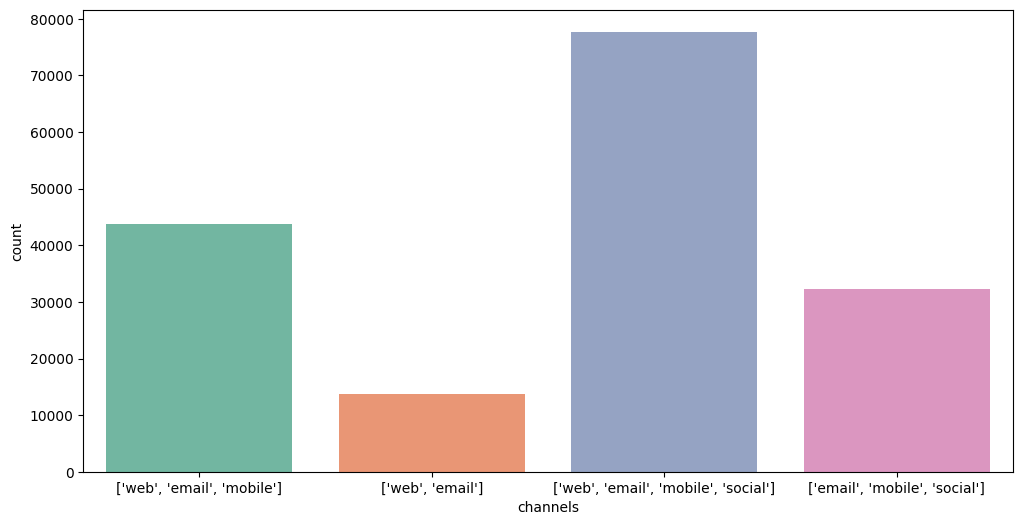

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()

#📌 **Part 3**
**┗ 인사이트 도출**  
---